In [3]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from utils import *

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
#mean squared error
from sklearn.metrics import mean_squared_error
models = [LinearRegression, RandomForestRegressor, SVR, XGBRegressor, KNeighborsRegressor]


processing lake Superior with shape:  (1260,)
Seasonal component shape:  (1260,)


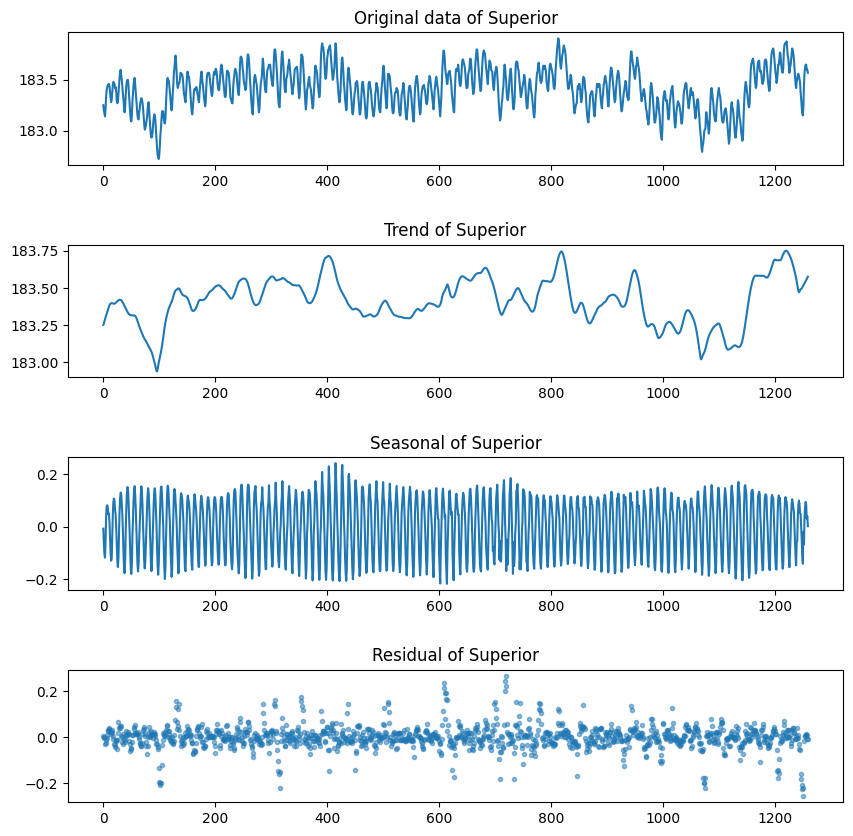

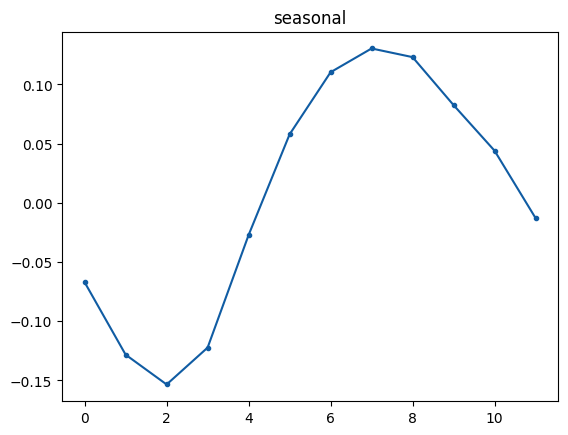

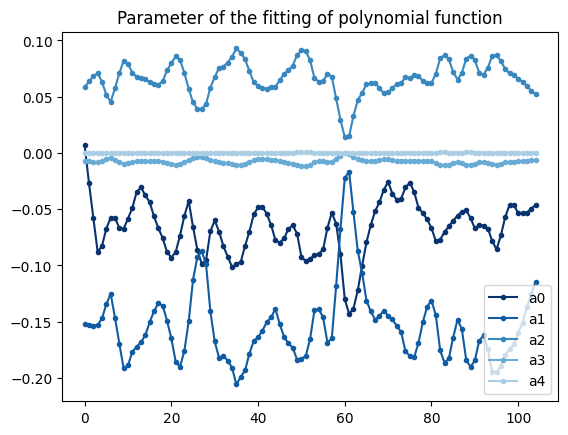

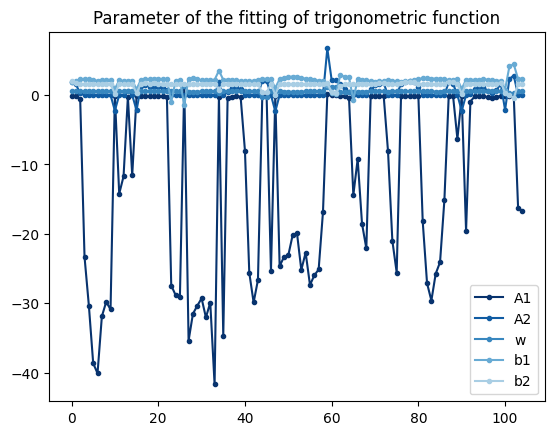

mse of polynomial fitting:  0.0003070711592480724
mse of trigonometric fitting:  0.0007494354314951852


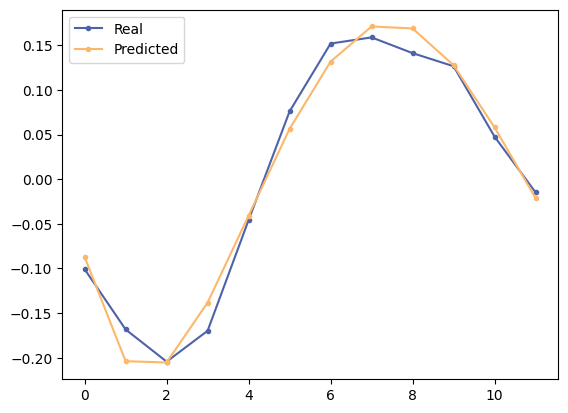

This is model  <class 'sklearn.linear_model._base.LinearRegression'>
The mse of validation is  9.410292930436382e-06
The mse of total is  0.000342731531447245


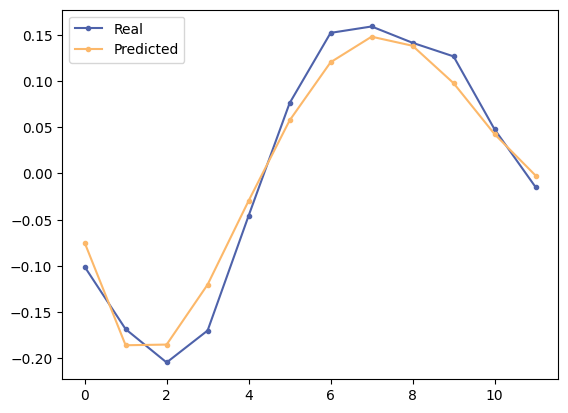

This is model  <class 'sklearn.ensemble._forest.RandomForestRegressor'>
The mse of validation is  4.1678566574304565e-05
The mse of total is  0.0004949550951433773
<class 'sklearn.svm._classes.SVR'> failed


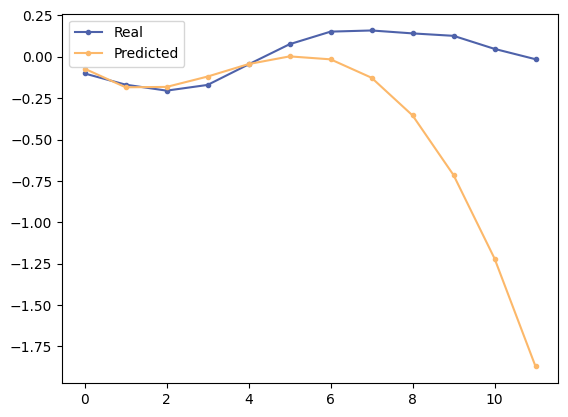

This is model  <class 'xgboost.sklearn.XGBRegressor'>
The mse of validation is  5.911298970597545e-05
The mse of total is  0.103912701668


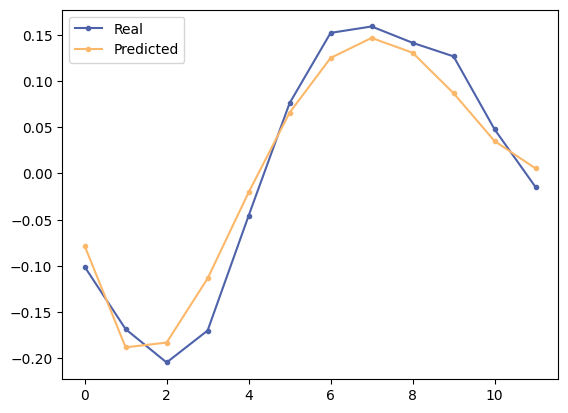

This is model  <class 'sklearn.neighbors._regression.KNeighborsRegressor'>
The mse of validation is  0.0001241648933110958
The mse of total is  0.0006664582234094973


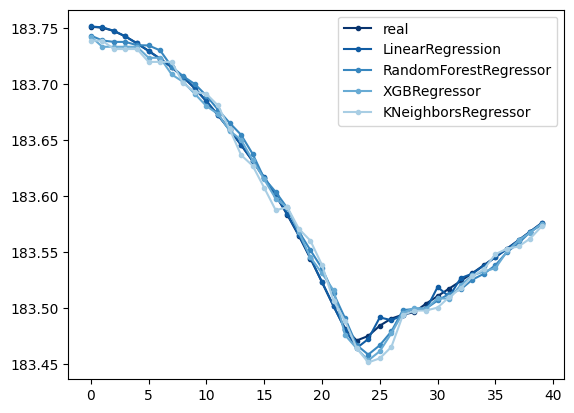

In [9]:
data = pd.read_csv('../data/GLHYD_data_metric.csv')
res, fig = decompose_node(data,"Superior", info = False, save = False)
plt.figure()
plt.plot(res.seasonal[24:36], color = color_set1[1],marker = ".")
plt.title("seasonal")
plt.show()
para, cov , fittingmse = fit_node(res,12,func2)
para_, cov_, fittingmse_ = fit_node(res,12,func1)
#plot the fittingmse using boxplot
plt.plot(para[:,0], color = color_set1[0],marker = '.')
plt.plot(para[:,1],color = color_set1[1], marker = '.')
plt.plot(para[:,2], color = color_set1[2], marker = '.')
plt.plot(para[:,3],color = color_set1[3], marker = '.')
plt.plot(para[:,4],color = color_set1[4], marker = '.')
plt.legend(['a0', 'a1', 'a2', 'a3', 'a4'])
plt.title('Parameter of the fitting of polynomial function')
plt.show()
#plot the fittingmse using boxplot
plt.plot(para_[:,0], color = color_set1[0],marker = '.')
plt.plot(para_[:,1],color = color_set1[1], marker = '.')
plt.plot(para_[:,2], color = color_set1[2], marker = '.')
plt.plot(para_[:,3],color = color_set1[3], marker = '.')
plt.plot(para_[:,4],color = color_set1[4], marker = '.')
plt.legend(['A1', 'A2', 'w', 'b1', 'b2'])
plt.title('Parameter of the fitting of trigonometric function')
plt.show()
print("mse of polynomial fitting: ", np.mean(fittingmse))
print("mse of trigonometric fitting: ", np.mean(fittingmse_))

def Trainer(model):
    paras, mse_validation, mse_total = trainer(para,model, res, func2, 12, info = False, plot = True)
    print("This is model ", model)
    print("The mse of validation is ", np.mean(mse_validation))
    print("The mse of total is ", np.mean(mse_total))
    return paras, mse_validation, mse_total
parass =[]
mse_validations = []
mse_total = []
for model in models:
    try:
        paras, mse_validation, mse_total = Trainer(model)
    except:
        print(model, "failed")
        continue
    parass.append(paras)
    mse_validations.append(mse_validation)
    mse_total.append(mse_total)
mse_of_trend = []
i = 1
color_set = [[i*0.9 if i*0.9 < 1 else 1 for i in color] for color in color_set2]
for model in models:
    mse, y_predict, y_test = trend_node(res, model())
    if model == SVR:
        continue
    if i ==1:
        plt.plot(y_test, label = "real", color = color_set1[0], marker = '.' )
    plt.plot(y_predict, label = f'{model.__name__}', color = color_set1[i],marker = '.')
    i+= 1
    plt.legend()
    mse_of_trend.append(mse)
 


In [6]:
print(mse_of_trend)

[6.712797508416709e-06, 5.432388830304926e-05, 6.718014292045965e-05, 0.0001107351468408693]


In [7]:
np.mean(res.resid), np.std(res.resid)

(0.00044536345536991956, 0.05238984177519699)